The experiments were run with the following command:
```sh
dvc exp run --queue \
    -S dataset.path='bdsaglam/musique-thesis' \
    -S qa.model='gpt-3.5-turbo,llama-3-70b-tgi' \
    -S qa.prompt='standard,cot-zs,cot-fs,cte' \
    -S run='1,2,3'
```

In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellek.dvc.experiment import load_experiments

experiments = load_experiments('thesis-repro.json')
print(f"{len(experiments)} experiments")
experiments[0]

25 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'dataset': {'path': 'bdsaglam/musique-thesis',
   'name': 'answerable',
   'split': 'validation'},
  'qa': {'prompt': 'standard', 'model': 'llama-3-70b-tgi', 'temperature': 0.1},
  'run': 1},
 'metrics': {'exact_match': 0.5, 'f1': 0.6599999999999999, 'fuzzy_match': 0.7}}

In [3]:
df = (
    pd.json_normalize(experiments)
    .sort_values(
        [
            "params.dataset.path",
            "params.dataset.name",
            "params.dataset.split",
            "params.qa.model",
            "params.qa.prompt",
            "params.qa.temperature",
            "params.run",
        ]
    )
    .drop(columns=["commit", "id"])
    .drop_duplicates()
    .reset_index(drop=True)
)
dataset_path = "bdsaglam/musique-thesis"
mask = df["params.dataset.path"] == dataset_path
df = df.loc[mask].reset_index(drop=True)
df

,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.prompt,params.qa.model,params.qa.temperature,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,magic-toff,bdsaglam/musique-thesis,answerable,validation,cot-fs,gpt-3.5-turbo,0.1,1,0.60,0.707942,0.68
1,shoed-impi,bdsaglam/musique-thesis,answerable,validation,cot-fs,gpt-3.5-turbo,0.1,2,0.61,0.706608,0.69
2,swish-tods,bdsaglam/musique-thesis,answerable,validation,cot-fs,gpt-3.5-turbo,0.1,3,0.60,0.688310,0.65
3,urban-tart,bdsaglam/musique-thesis,answerable,validation,cot-zs,gpt-3.5-turbo,0.1,1,0.49,0.644370,0.60
4,tubal-flus,bdsaglam/musique-thesis,answerable,validation,cot-zs,gpt-3.5-turbo,0.1,2,0.54,0.691050,0.63
5,undue-bomb,bdsaglam/musique-thesis,answerable,validation,cot-zs,gpt-3.5-turbo,0.1,3,0.54,0.688755,0.64
6,vital-lick,bdsaglam/musique-thesis,answerable,validation,cte,gpt-3.5-turbo,0.1,1,0.58,0.704951,0.67
7,podgy-jynx,bdsaglam/musique-thesis,answerable,validation,cte,gpt-3.5-turbo,0.1,2,0.55,0.685762,0.62
8,dotty-kobs,bdsaglam/musique-thesis,answerable,validation,cte,gpt-3.5-turbo,0.1,3,0.59,0.709792,0.66
9,gusty-tamp,bdsaglam/musique-thesis,answerable,validation,standard,gpt-3.5-turbo,0.1,1,0.50,0.597104,0.59


In [4]:
metric_cols = [col for col in df.columns if col.startswith("metrics.")]

In [5]:
# Average metrics over repeated runs (params.run)
df_avg = df.groupby(["params.qa.model", "params.qa.prompt"])[metric_cols].mean().reset_index()
df_avg

,params.qa.model,params.qa.prompt,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,gpt-3.5-turbo,cot-fs,0.603333,0.700953,0.673333
1,gpt-3.5-turbo,cot-zs,0.523333,0.674725,0.623333
2,gpt-3.5-turbo,cte,0.573333,0.700168,0.650000
3,gpt-3.5-turbo,standard,0.500000,0.609178,0.600000
4,llama-3-70b-tgi,cot-fs,0.510000,0.557628,0.543333
5,llama-3-70b-tgi,cot-zs,0.490000,0.581498,0.546667
6,llama-3-70b-tgi,cte,0.616667,0.692672,0.666667
7,llama-3-70b-tgi,standard,0.550000,0.663031,0.647500


In [6]:
prompt_order = ['standard', 'cot-zs', 'cot-fs', 'cte']
df_avg['params.qa.prompt'] = pd.Categorical(df_avg['params.qa.prompt'], categories=prompt_order, ordered=True)
df_avg = df_avg.sort_values('params.qa.prompt')
df_avg

,params.qa.model,params.qa.prompt,metrics.exact_match,metrics.f1,metrics.fuzzy_match
3,gpt-3.5-turbo,standard,0.500000,0.609178,0.600000
7,llama-3-70b-tgi,standard,0.550000,0.663031,0.647500
1,gpt-3.5-turbo,cot-zs,0.523333,0.674725,0.623333
5,llama-3-70b-tgi,cot-zs,0.490000,0.581498,0.546667
0,gpt-3.5-turbo,cot-fs,0.603333,0.700953,0.673333
4,llama-3-70b-tgi,cot-fs,0.510000,0.557628,0.543333
2,gpt-3.5-turbo,cte,0.573333,0.700168,0.650000
6,llama-3-70b-tgi,cte,0.616667,0.692672,0.666667


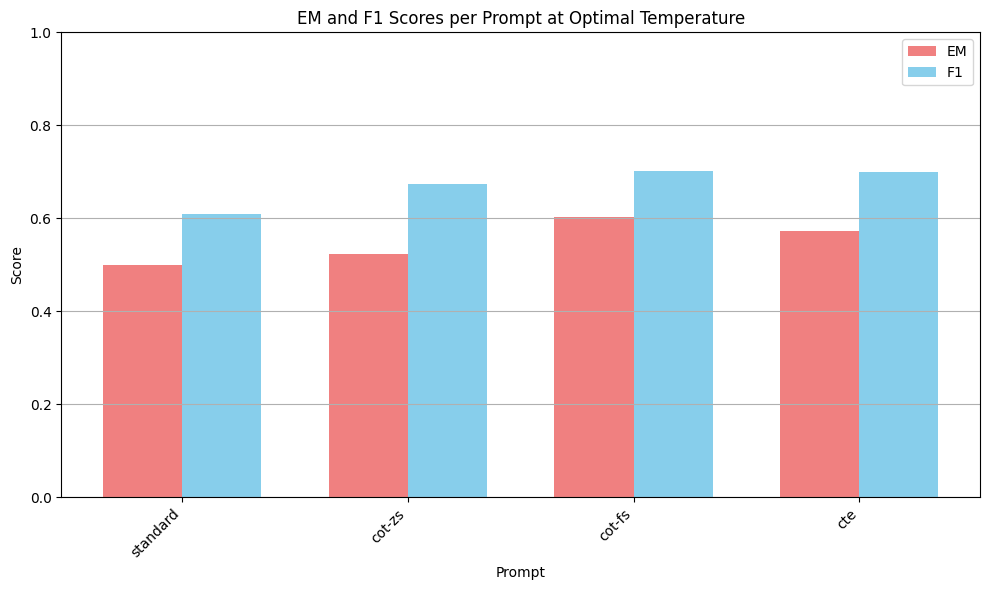

In [7]:
# Plotting EM and F1 scores together per prompt with temperature annotations
plt.figure(figsize=(10, 6))

model_mask = df_avg["params.qa.model"] == "gpt-3.5-turbo"

# Create x-tick labels that include both the prompt and temperature
xs = df_avg.loc[model_mask]['params.qa.prompt'].values

# Set the width for the bars and the positions
bar_width = 0.35
index = np.arange(len(xs))

# Plot Exact Match (EM) bars
bar1 = plt.bar(index, df_avg.loc[model_mask]["metrics.exact_match"].values, bar_width, label="EM", color="lightcoral")

# Plot F1 bars, shifted by bar_width for side-by-side bars
bar2 = plt.bar(index + bar_width, df_avg.loc[model_mask]["metrics.f1"].values, bar_width, label="F1", color="skyblue")

# Add labels and titles
plt.xlabel('Prompt')
plt.ylabel('Score')
plt.title('EM and F1 Scores per Prompt at Optimal Temperature')

# Set x-ticks with prompt and temperature labels
plt.xticks(index + bar_width / 2, xs, rotation=45, ha='right')

# Add a legend to differentiate between EM and F1 scores
plt.legend()

# Add a grid and display the plot
plt.grid(axis='y')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

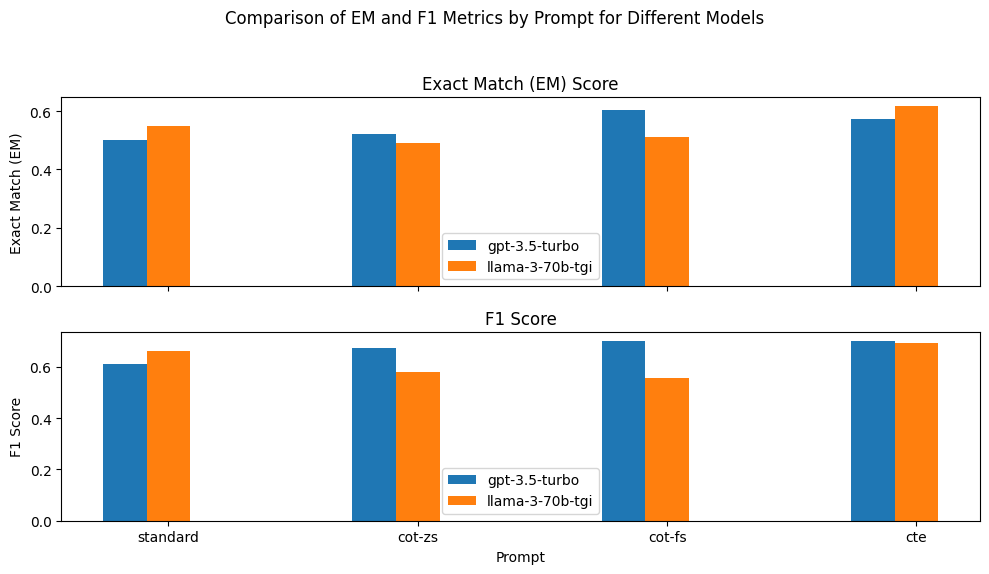

In [8]:
# Get unique models and prompts
models = df_avg['params.qa.model'].unique()
prompts = df_avg['params.qa.prompt'].unique()

# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('Comparison of EM and F1 Metrics by Prompt for Different Models')

x = np.arange(len(prompts))
width = 0.35 / len(models)  # Adjust width based on the number of models

# Plot EM and F1 scores for each model
for i, model in enumerate(models):
    model_df = df_avg[df_avg['params.qa.model'] == model]
    ax[0].bar(x + (i - len(models) / 2) * width, model_df['metrics.exact_match'], width, label=model)
    ax[1].bar(x + (i - len(models) / 2) * width, model_df['metrics.f1'], width, label=model)

# Set labels and titles for EM scores plot
ax[0].set_ylabel('Exact Match (EM)')
ax[0].set_title('Exact Match (EM) Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(prompts)
ax[0].legend(loc='best')

# Set labels and titles for F1 scores plot
ax[1].set_xlabel('Prompt')
ax[1].set_ylabel('F1 Score')
ax[1].set_title('F1 Score')
ax[1].set_xticks(x)
ax[1].set_xticklabels(prompts)
ax[1].legend(loc='best')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()